## Week 8: Image Segmenation with GMM

The NLM Visible Human Project® has created publicly-available complete, anatomically detailed, three-dimensional representations of a human male body and a human female body. Specifically, the VHP provides a public-domain library of cross-sectional cryosection, CT, and MRI images obtained from one male cadaver and one female cadaver. The Visible Man data set was publicly released in 1994 and the Visible Woman in 1995.

https://www.nlm.nih.gov/research/visible/visible_human.html

### Step 1: Import packages

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.image import imread

from PIL import Image
from sklearn.mixture import GaussianMixture as GMM
import cv2

Let's see how GMM does with an image segmentation task on MRI images.

---
### Step 2: Load Data

In [ ]:
# mount drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load TIFF images from drive
directory = '/content/drive/MyDrive/Colab Notebooks/MIDS-F207/Demos_v2/08_Clustering_PCA/'
pic1_name = '65.tif'
pic2_name = '10.tif'

In [ ]:
# Full path for images
image1_path = os.path.join(directory, pic1_name)
image2_path  = os.path.join(directory, pic2_name)

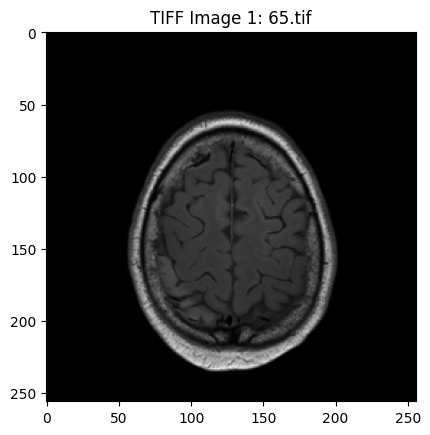

In [ ]:
# Load image 1
image1 = Image.open(image1_path)

# Display the image with pixel values
fig, ax = plt.subplots()
ax.imshow(image1, cmap='gray')  # Use 'gray' cmap for grayscale images
ax.set_title(f'TIFF Image 1: {pic1_name}')

# Display the image
plt.show()

### Preprocessing

In [ ]:
# Convert the image to a NumPy array
image1 = np.array(image1)

In [ ]:
# get shape & size in bytes
print('Image shape:', image1.shape)
print('Image size in bytes:', os.stat(image1_path).st_size)

Image shape: (256, 256)
Image size in bytes: 67294


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
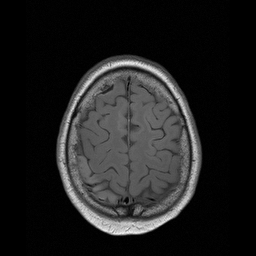

In [ ]:
image1

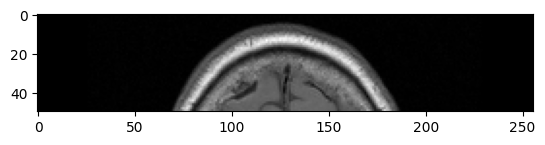

In [ ]:
# Display a portion of the image
plt.imshow(image1[50:100,:], cmap='gray')
plt.show()


#### Reshape

In [ ]:
# Reshape image: convert MxN image into Kx1 where K=MxN
image1b = image1.reshape((-1, 1))  # -1 reshape means in this case MxN

In [ ]:
image1b.shape

(65536, 1)

### EDA

#### Histogram of data

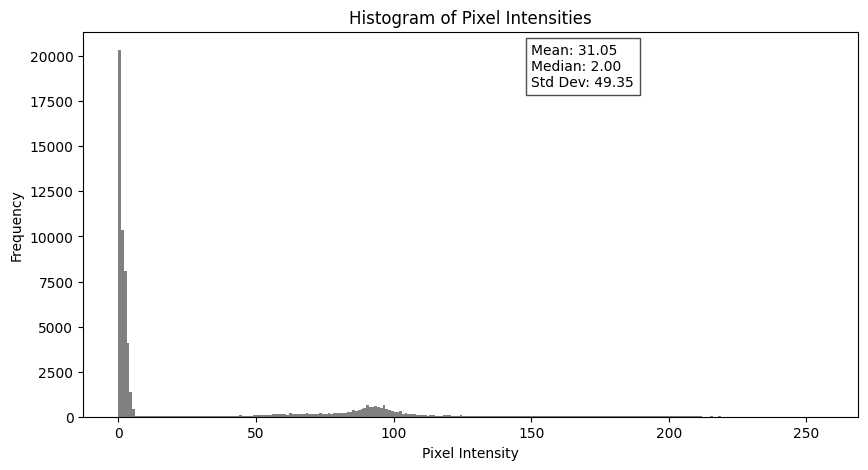

In [ ]:
# Display a histogram of pixel intensities
hist, bins = np.histogram(image1b, bins=256, range=(0, 256))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color='gray', align='edge') # Use bar plot
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Intensities")

# Display statistics (e.g., mean, median, standard deviation)
mean_intensity = np.mean(image1b)
median_intensity = np.median(image1b)
std_dev_intensity = np.std(image1b)


plt.text(150, max(hist) * 0.9, f"Mean: {mean_intensity:.2f}\nMedian: {median_intensity:.2f}\nStd Dev: {std_dev_intensity:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()


#### Analyze the number of clusters using the Bayesian Information Criterion (BIC)

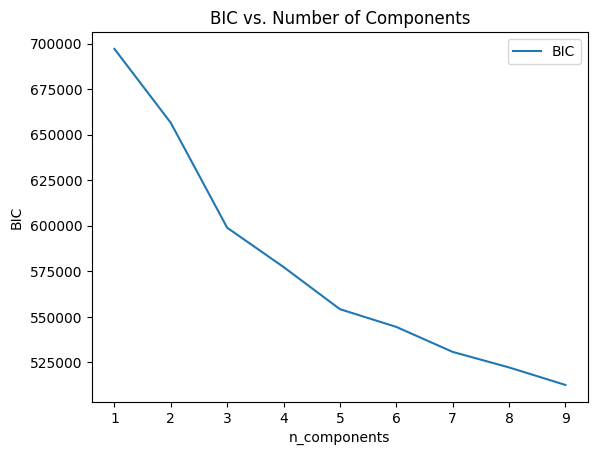

In [ ]:
# Calculate BIC for a different number of clusters
n_components = np.arange(1, 10)
models = [GMM(n, covariance_type='tied', random_state=0).fit(image1b) for n in n_components]
plt.plot(n_components, [m.bic(image1b) for m in models], label='BIC')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC vs. Number of Components')
plt.legend(loc='best')
plt.show()


### Build a GMM

1. The **GaussianMixture** object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.
2. **A GaussianMixture.fit** method is provided that learns a Gaussian Mixture Model from train data.
3. Given test data, it can assign to each sample the Gaussian it most probably belongs to using the **GaussianMixture.predict** method.

Ref: https://scikit-learn.org/stable/modules/mixture.html



In [ ]:
# GMM: build and train model, predict
gmm_model = GMM(n_components=5, covariance_type='tied').fit(image1b)
gmm_labels = gmm_model.predict(image1b)

In [ ]:
# use original shape to reconstruct the segmented image
original_shape = image1.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

In [ ]:
# write the segmented image
image1_out = os.path.join(directory, 'segmented_image1.jpg')
cv2.imwrite(image1_out, segmented)

True

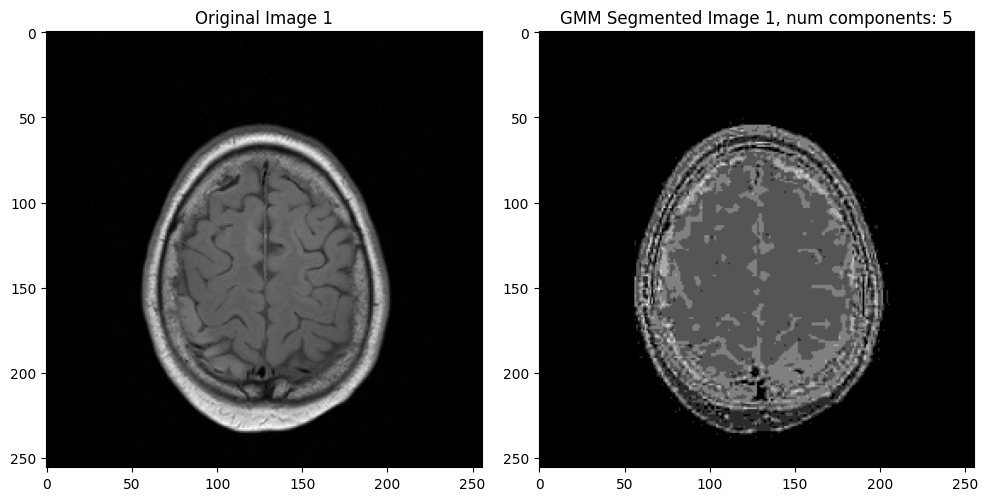

In [ ]:
# path to the saved segmented image
segmented_image_path = os.path.join(directory, 'segmented_image1.jpg')

# Open the segmented image using OpenCV
segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Original Image 1')

# Display the segmented image
axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('GMM Segmented Image 1, num components: 5')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# plt.imshow(segmented_image, cmap='gray')
# plt.title('Segmented Image 1')
# plt.show()